# Encontrando anomalias com Knn

Neste notebook vamos novamente usar os dados do iris, mas desta vez para identificar os outliers. Apesar de ser um algoritmo supervisionado, aqui ele será usado de forma não supervisionada porque não se deseja fazer nenhuma classificação, e sim apenas encontrar um limiar para os dados.

In [2]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors

In [6]:
# Carregar dados

iris_dataset = load_iris()
iris_dataframe = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

**Visualizar os dados**

In [8]:
iris_dataframe.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


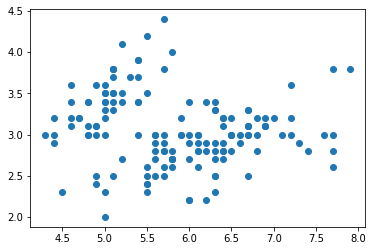

In [10]:
# scatterplot com dois atributos da sépala

plt.scatter(iris_dataframe["sepal length (cm)"], iris_dataframe["sepal width (cm)"]);

---

### Modelando os dados

Se olharmos no notebook knn_iris, lembramos que o melhor valor de k era 10, então vamos usar esse valor.

In [15]:
model = NearestNeighbors(n_neighbors = 10)
model.fit(iris_dataset.data)

NearestNeighbors(n_neighbors=10)

---

### Identificando as anomalias

Com o modelo treinado, vamos extrair as distâncias entre os dados e os índices dos valores.

In [16]:
distancias, idx = model.kneighbors(iris_dataset.data)

E agora plotamos o gráfico.

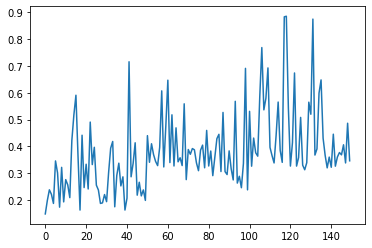

In [68]:
plt.plot(distancias.mean(axis =1));

Observando o gráfico é possível ver alguns pontos mais desnivelados em relação aos demais, talvez estes sejam as anomalias. E aqui vem uma parte que depende da pecinha humana ao computador: decidir a linha de corte para filtrar as anomalias.

Me parece que os valores mais afastados estão ali para cima de 0,6 no eixo y, então vamos selecioná-los. Mas para ficar mais claro, vamos criar uma linha no gráfico.

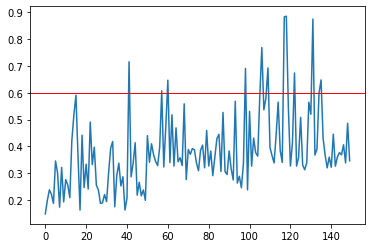

In [82]:
plt.plot(distancias.mean(axis =1));
plt.axhline(y= 0.6, linewidth=1, color='r');

Olhando agora com a linha, percebo que mais ao lado esquerdo do gráfico, tem um ponto que poderia ser considerado como outlier, que está quase no 0.6, então vamos considerar o valor 0.58, para pegar esse ponto.

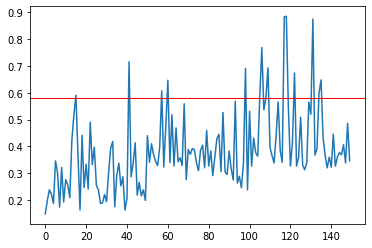

In [87]:
plt.plot(distancias.mean(axis =1));
plt.axhline(y= 0.58, linewidth=1, color='r');

In [88]:
outliers_idx = np.where(distancias.mean(axis = 1) >= 0.58)
outliers_idx

(array([ 15,  41,  57,  60,  98, 105, 106, 109, 117, 118, 122, 131, 134,
        135], dtype=int64),)

In [89]:
# filter outlier values

outliers_valores = iris_dataframe.iloc[outliers_idx]
outliers_valores

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
41,4.5,2.3,1.3,0.3
57,4.9,2.4,3.3,1.0
60,5.0,2.0,3.5,1.0
98,5.1,2.5,3.0,1.1
105,7.6,3.0,6.6,2.1
106,4.9,2.5,4.5,1.7
109,7.2,3.6,6.1,2.5
117,7.7,3.8,6.7,2.2
118,7.7,2.6,6.9,2.3


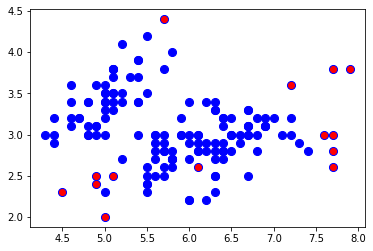

In [90]:
# plotar dados
plt.scatter(iris_dataframe["sepal length (cm)"], iris_dataframe["sepal width (cm)"], color = "b", s = 65)

# plotar outliers
plt.scatter(outliers_valores["sepal length (cm)"], outliers_valores["sepal width (cm)"], color = "r");

--- 

### Referências

[k-Nearest Neighbors (kNN) for anomaly detection](https://towardsdatascience.com/k-nearest-neighbors-knn-for-anomaly-detection-fdf8ee160d13)